In [1]:
#Project Template

In [106]:
#Dependancies
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [3]:
#Data Cleaning (Joe and Anthony)

# Joe

In [4]:
#Cleaning the pollution csv

In [5]:
file = "dataset/cleanpollution2011-2016.csv"

In [6]:
#look at the file
df = pd.read_csv(file)
df.head()

,State,City,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,Arizona,Phoenix,2011-01-01,Parts per billion,24.416667,Parts per million,0.014417,Parts per billion,1.708333,Parts per million,0.995833
1,Arizona,Phoenix,2011-01-01,Parts per billion,24.416667,Parts per million,0.014417,Parts per billion,1.708333,Parts per million,0.873684
2,Arizona,Phoenix,2011-01-01,Parts per billion,24.416667,Parts per million,0.014417,Parts per billion,1.675000,Parts per million,0.995833
3,Arizona,Phoenix,2011-01-01,Parts per billion,24.416667,Parts per million,0.014417,Parts per billion,1.675000,Parts per million,0.873684
4,Arizona,Phoenix,2011-01-02,Parts per billion,30.750000,Parts per million,0.007917,Parts per billion,2.291667,Parts per million,1.116667


In [7]:
#Filter the date range I want (2014-2016)
date_df = df.loc[(df['Date Local'] > '2013-12-31')]

date_df.head()

,State,City,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
392030,Alabama,Birmingham,2014-01-01,Parts per billion,16.5125,Parts per million,0.013250,Parts per billion,0.363636,Parts per million,0.204545
392031,Alabama,Birmingham,2014-01-01,Parts per billion,16.5125,Parts per million,0.013250,Parts per billion,0.363636,Parts per million,0.200000
392032,Alabama,Birmingham,2014-01-01,Parts per billion,16.5125,Parts per million,0.013250,Parts per billion,0.242857,Parts per million,0.204545
392033,Alabama,Birmingham,2014-01-01,Parts per billion,16.5125,Parts per million,0.013250,Parts per billion,0.242857,Parts per million,0.200000
392034,Alabama,Birmingham,2014-01-02,Parts per billion,3.6625,Parts per million,0.018458,Parts per billion,-0.009091,Parts per million,0.158824


In [76]:
#Pulling out the states I want
statecities_df = date_df
state_list =['California', 'Texas', 'Florida','New Jersey','Illinois', 'Colorado', 'North Carolina']


In [9]:
#Filtered the States
statecities_df[statecities_df.State.isin(state_list)]

,State,City,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
437840,Colorado,Welby,2014-01-01,Parts per billion,14.608696,Parts per million,0.018792,Parts per billion,0.541667,Parts per million,0.275000
437841,Colorado,Welby,2014-01-01,Parts per billion,14.608696,Parts per million,0.018792,Parts per billion,0.541667,Parts per million,0.263158
437842,Colorado,Welby,2014-01-01,Parts per billion,14.608696,Parts per million,0.018792,Parts per billion,0.525000,Parts per million,0.275000
437843,Colorado,Welby,2014-01-01,Parts per billion,14.608696,Parts per million,0.018792,Parts per billion,0.525000,Parts per million,0.263158
437844,Colorado,Welby,2014-01-02,Parts per billion,37.043478,Parts per million,0.002833,Parts per billion,2.041667,Parts per million,0.633333
...,...,...,...,...,...,...,...,...,...,...,...
673532,Texas,Waco,2016-04-29,Parts per billion,1.325000,Parts per million,0.027125,Parts per billion,0.542857,Parts per million,0.200000
673533,Texas,Waco,2016-04-30,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.129167
673534,Texas,Waco,2016-04-30,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.188235,Parts per million,0.133333
673535,Texas,Waco,2016-04-30,Parts per billion,2.670833,Parts per million,0.030889,Parts per billion,-0.166667,Parts per million,0.129167


In [10]:
#Filtering the Cities
city_list = ['Los Angeles', 'Dallas', 'Winter Park', 'Newark', 'Chicago', 'Denver', 'Charlotte']

In [11]:
statecities_df[statecities_df.City.isin(city_list)]

,State,City,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
415706,California,Los Angeles,2014-01-01,Parts per billion,51.871429,Parts per million,0.010333,Parts per billion,1.004545,Parts per million,1.633333
415707,California,Los Angeles,2014-01-01,Parts per billion,51.871429,Parts per million,0.010333,Parts per billion,1.004545,Parts per million,1.523529
415708,California,Los Angeles,2014-01-01,Parts per billion,51.871429,Parts per million,0.010333,Parts per billion,1.004545,Parts per million,1.376455
415709,California,Los Angeles,2014-01-01,Parts per billion,51.871429,Parts per million,0.010333,Parts per billion,1.004545,Parts per million,1.294444
415710,California,Los Angeles,2014-01-01,Parts per billion,51.871429,Parts per million,0.010333,Parts per billion,0.966667,Parts per million,1.633333
...,...,...,...,...,...,...,...,...,...,...,...
671788,Texas,Dallas,2016-03-30,Parts per billion,5.163636,Parts per million,0.018292,Parts per billion,0.133333,Parts per million,0.191667
671789,Texas,Dallas,2016-03-31,Parts per billion,7.566667,Parts per million,0.031316,Parts per billion,0.133333,Parts per million,0.181500
671790,Texas,Dallas,2016-03-31,Parts per billion,7.566667,Parts per million,0.031316,Parts per billion,0.133333,Parts per million,0.195833
671791,Texas,Dallas,2016-03-31,Parts per billion,7.566667,Parts per million,0.031316,Parts per billion,0.112500,Parts per million,0.181500


In [12]:
#remove duplicate readings as the data summary nevere clears up why there is multiple readings

In [13]:
cleanstatecities_df = statecities_df
# .drop_duplicates(subset ='Date Local', keep = 'first')

In [14]:
cleanstatecities_df

,State,City,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
392030,Alabama,Birmingham,2014-01-01,Parts per billion,16.512500,Parts per million,0.013250,Parts per billion,0.363636,Parts per million,0.204545
392031,Alabama,Birmingham,2014-01-01,Parts per billion,16.512500,Parts per million,0.013250,Parts per billion,0.363636,Parts per million,0.200000
392032,Alabama,Birmingham,2014-01-01,Parts per billion,16.512500,Parts per million,0.013250,Parts per billion,0.242857,Parts per million,0.204545
392033,Alabama,Birmingham,2014-01-01,Parts per billion,16.512500,Parts per million,0.013250,Parts per billion,0.242857,Parts per million,0.200000
392034,Alabama,Birmingham,2014-01-02,Parts per billion,3.662500,Parts per million,0.018458,Parts per billion,-0.009091,Parts per million,0.158824
...,...,...,...,...,...,...,...,...,...,...,...
674274,Wyoming,Not in a city,2016-03-30,Parts per billion,1.083333,Parts per million,0.043917,Parts per billion,0.000000,Parts per million,0.091667
674275,Wyoming,Not in a city,2016-03-31,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,-0.022727,Parts per million,0.067714
674276,Wyoming,Not in a city,2016-03-31,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,-0.022727,Parts per million,0.100000
674277,Wyoming,Not in a city,2016-03-31,Parts per billion,0.939130,Parts per million,0.045263,Parts per billion,0.000000,Parts per million,0.067714


In [15]:
cleanstatecities_df.to_csv ("dataset/cleanpollution14-2016.csv", index=False, header=True)


In [16]:
# upload cleanpollution14-2016.csv
file = "dataset/cleanpollution14-2016.csv"
cleanpollution = pd.read_csv(file)
cleanpollution.count()


State         282249
City          282249
Date Local    282249
NO2 Units     282249
NO2 Mean      282249
O3 Units      282249
O3 Mean       282249
SO2 Units     282249
SO2 Mean      282249
CO Units      282249
CO Mean       282249
dtype: int64

In [17]:
# Convert Date Local to datetime
cleanpollution['Date Local'] = pd.to_datetime(cleanpollution['Date Local'], infer_datetime_format=True)
cleanpollution.head()

,State,City,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,Alabama,Birmingham,2014-01-01,Parts per billion,16.5125,Parts per million,0.013250,Parts per billion,0.363636,Parts per million,0.204545
1,Alabama,Birmingham,2014-01-01,Parts per billion,16.5125,Parts per million,0.013250,Parts per billion,0.363636,Parts per million,0.200000
2,Alabama,Birmingham,2014-01-01,Parts per billion,16.5125,Parts per million,0.013250,Parts per billion,0.242857,Parts per million,0.204545
3,Alabama,Birmingham,2014-01-01,Parts per billion,16.5125,Parts per million,0.013250,Parts per billion,0.242857,Parts per million,0.200000
4,Alabama,Birmingham,2014-01-02,Parts per billion,3.6625,Parts per million,0.018458,Parts per billion,-0.009091,Parts per million,0.158824


In [18]:
# Averaging pollution data on weekly basis
cleanpollution = cleanpollution.groupby(['State', pd.Grouper(key='Date Local', freq='W-MON')]) \
       .mean() \
       .reset_index() \
       .sort_values('Date Local')
cleanpollution

,State,Date Local,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,Alabama,2014-01-06,6.693182,0.020000,0.288217,0.135236
4285,Wyoming,2014-01-06,2.505572,0.038847,0.121528,0.065982
1905,Maine,2014-01-06,3.670139,0.028312,1.030556,0.189661
2634,New Jersey,2014-01-06,22.858811,0.013878,1.080071,0.426360
1786,Louisiana,2014-01-06,11.584803,0.017743,2.196918,0.218249
...,...,...,...,...,...,...
112,Alabama,2016-05-30,11.203572,0.034940,1.211546,0.283835
2031,Maine,2016-06-06,4.404167,0.031842,0.062500,0.266583
3091,North Carolina,2016-06-06,5.787500,0.034526,0.288509,0.193937
113,Alabama,2016-06-06,19.259091,0.027000,3.570780,0.346250


In [19]:
#Clean the gas price csv
gasfile = "dataset/gasprices.csv"

In [20]:
gasdata = pd.read_csv(gasfile)
gasdata

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1/2/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1/9/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,1/4/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,1/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,1/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [21]:
#Grabbing the rows I want
gasdata.columns

Index(['Date', 'A1', 'A2', 'A3', 'R1', 'R2', 'R3', 'M1', 'M2', 'M3', 'P1',
       'P2', 'P3', 'D1'],
      dtype='object')

In [22]:
gasdata_reduced = gasdata.loc[:,['Date', 'A2']]
gasdata_reduced.head()

,Date,A2
0,1/2/1995,1.104
1,1/9/1995,1.111
2,1/16/1995,1.102
3,1/23/1995,1.110
4,1/30/1995,1.109


In [23]:
gasdata_reduced = gasdata_reduced.rename(columns={"A2":"Gas Prices"}) 
gasdata_reduced.head()

,Date,Gas Prices
0,1/2/1995,1.104
1,1/9/1995,1.111
2,1/16/1995,1.102
3,1/23/1995,1.110
4,1/30/1995,1.109


In [24]:
gasdata_reduced.count()

Date          1361
Gas Prices    1361
dtype: int64

In [25]:
# convert Date to datetime
gasdata_reduced['Date'] = pd.to_datetime(gasdata_reduced['Date'])
print(gasdata_reduced)

           Date  Gas Prices
0    1995-01-02       1.104
1    1995-01-09       1.111
2    1995-01-16       1.102
3    1995-01-23       1.110
4    1995-01-30       1.109
...         ...         ...
1356 2020-12-28       2.225
1357 2021-01-04       2.227
1358 2021-01-11       2.298
1359 2021-01-18       2.351
1360 2021-01-25       2.363

[1361 rows x 2 columns]


In [26]:
# Rename Date to Date Local to create a similar key variable for merging pollution and gas files
gasdata_reduced.rename(columns={'Date': 'Date Local'}, inplace=True)
print(gasdata_reduced)

     Date Local  Gas Prices
0    1995-01-02       1.104
1    1995-01-09       1.111
2    1995-01-16       1.102
3    1995-01-23       1.110
4    1995-01-30       1.109
...         ...         ...
1356 2020-12-28       2.225
1357 2021-01-04       2.227
1358 2021-01-11       2.298
1359 2021-01-18       2.351
1360 2021-01-25       2.363

[1361 rows x 2 columns]


In [27]:
# merge weekly pollution and gas data
combinedfiles = pd.merge(left=cleanpollution, right=gasdata_reduced, left_on='Date Local', right_on='Date Local')
combinedfiles

,State,Date Local,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,Gas Prices
0,Alabama,2014-01-06,6.693182,0.020000,0.288217,0.135236,3.340
1,Wyoming,2014-01-06,2.505572,0.038847,0.121528,0.065982,3.340
2,Maine,2014-01-06,3.670139,0.028312,1.030556,0.189661,3.340
3,New Jersey,2014-01-06,22.858811,0.013878,1.080071,0.426360,3.340
4,Louisiana,2014-01-06,11.584803,0.017743,2.196918,0.218249,3.340
...,...,...,...,...,...,...,...
4398,Alabama,2016-05-30,11.203572,0.034940,1.211546,0.283835,2.382
4399,Maine,2016-06-06,4.404167,0.031842,0.062500,0.266583,2.430
4400,North Carolina,2016-06-06,5.787500,0.034526,0.288509,0.193937,2.430
4401,Alabama,2016-06-06,19.259091,0.027000,3.570780,0.346250,2.430


In [28]:
#Charts (Simmy)

In [29]:
#Regression (Simmy/Nate)

In [ ]:
#Get Data For Each State 'Califorina', 'Texas', 'Florida','New Jersey','Illinois', 'Colorado', 'North Carolina'
StateSubset=combinedfiles[combinedfiles["State"].isin(state_list)]

In [91]:
Datesorted=StateSubset.groupby(["Date Local"]).count()
Datesorted=Datesorted[Datesorted["State"]==7]
testabledates=Datesorted.index
testabledates

DatetimeIndex(['2014-01-06', '2014-01-13', '2014-01-20', '2014-01-27',
               '2014-02-03', '2014-02-10', '2014-02-17', '2014-02-24',
               '2014-03-03', '2014-03-10',
               ...
               '2015-11-02', '2015-11-09', '2015-11-16', '2015-11-23',
               '2015-11-30', '2015-12-07', '2015-12-14', '2015-12-21',
               '2015-12-28', '2016-01-04'],
              dtype='datetime64[ns]', name='Date Local', length=105, freq=None)

In [101]:
TotalStates=StateSubset[StateSubset["Date Local"].isin(testabledates)]
TotalStates=TotalStates.groupby("Date Local").sum()
TotalStates["Gas Prices"]=TotalStates["Gas Prices"]/7
TotalStates

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,Gas Prices
Date Local,,,,,
2014-01-06,98.114146,0.135254,4.394393,2.533714,3.340
2014-01-13,110.790005,0.132457,5.976836,2.710956,3.345
2014-01-20,112.994690,0.140204,5.630784,2.614911,3.319
2014-01-27,94.063677,0.165397,6.189240,2.277796,3.320
2014-02-03,107.650918,0.134016,7.522418,2.673294,3.322
...,...,...,...,...,...
2015-12-07,120.360045,0.096762,5.298767,3.698910,2.074
2015-12-14,106.499841,0.123813,3.586385,2.857298,2.059
2015-12-21,98.892236,0.114162,3.715306,2.478987,2.035


In [102]:
CombinedStates=StateSubset.groupby(["State", "Date Local"]).sum()
CaliforniaData=CombinedStates.loc["California"]
TexasData=CombinedStates.loc["Texas"]
FloridaData=CombinedStates.loc["Florida"]
NewJerseyData=CombinedStates.loc["New Jersey"]
IllinoisData=CombinedStates.loc["Illinois"]
ColoradoData=CombinedStates.loc["Colorado"]
NorthCarolinaData=CombinedStates.loc["North Carolina"]
CombinedStates

NO2 Mean   O3 Mean  SO2 Mean   CO Mean  Gas Prices
State      Date Local                                                     
California 2014-01-06  23.888806  0.013882  0.864876  0.690714       3.340
           2014-01-13  21.009139  0.015756  0.700489  0.590801       3.345
           2014-01-20  24.632725  0.016814  0.856255  0.669807       3.319
           2014-01-27  22.424858  0.016865  0.702719  0.597867       3.320
           2014-02-03  13.191926  0.022418  0.425689  0.370179       3.322
...                          ...       ...       ...       ...         ...
Texas      2016-04-04   7.656650  0.028952  0.219786  0.187154       2.095
           2016-04-11   8.706389  0.034661  0.370226  0.209020       2.085
           2016-04-18   6.801118  0.029595  0.259937  0.161721       2.155
           2016-04-25   6.804149  0.034264  0.271956  0.162120       2.182
           2016-05-02   5.089318  0.033554  0.227107  0.156535       2.271

[834 rows x 5 columns]

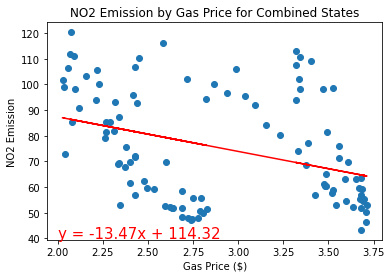

In [111]:
x_values = TotalStates['Gas Prices']
y_values = TotalStates['NO2 Mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,40),fontsize=15,color="red")
plt.xlabel('Gas Price ($)')
plt.ylabel('NO2 Emission')
plt.title("NO2 Emission by Gas Price for Combined States")
plt.show()

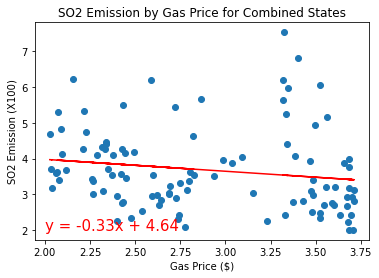

In [117]:
x_values = TotalStates['Gas Prices']
y_values = TotalStates['SO2 Mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,2),fontsize=15,color="red")
plt.xlabel('Gas Price ($)')
plt.ylabel('SO2 Emission')
plt.title("SO2 Emission by Gas Price for Combined States")
plt.show()

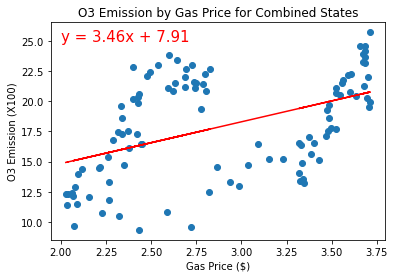

In [118]:
x_values = TotalStates['Gas Prices']
y_values = TotalStates['O3 Mean']*100
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,25),fontsize=15,color="red")
plt.xlabel('Gas Price ($)')
plt.ylabel('O3 Emission (X100)')
plt.title("O3 Emission by Gas Price for Combined States")
plt.show()

In [ ]:
x_values = TotalStates['Gas Prices']
y_values = TotalStates['CO Mean']*100
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,25),fontsize=15,color="red")
plt.xlabel('Gas Price ($)')
plt.ylabel('CO Emission (X100)')
plt.title("O3 Emission by Gas Price for Combined States")
plt.show()

In [31]:
#Hypothesis Testing (Nate)